In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from ISLP.models import (ModelSpec as MS, summarize , poly)
from sklearn.model_selection import train_test_split

np.random.seed(24521421)

# Experiment 1:

- Tạo 03 bộ dữ liệu D1, D2, D3. Mỗi bộ dữ liệu gồm có 1 tập train gồm N=10 điểm dữ liệu và 1 tập test gồm N=10 điểm dữ liệu. Các điểm dữ liệu (x,y) có giá trị input x được phát sinh ngẫu nhiên trong khoảng (0,1) và giá trị target y = f(x)=sin(1 + x^2) + ε với ε tuân theo phân phối chuẩn N(0,σ=0.03) như trong trang 60-61 của slides (standard deviation là 0.03).
- Với mỗi bộ dữ liệu D1, D2, D3, sử dụng tập train để huấn luyện 9 mô hình polynomial regression có bậc (degree) từ 1-9 như trong trang 70 của slides. Các em cần plot được minh họa ghép 9 đồ thị vào trong 1 hình như trong trang 70 này.
- Với bộ dữ liệu D1, tính giá trị E_in (sử dụng tập train) và E_out (sử dụng tập test) tương ứng cho 9 mô hình và tạo ra 1 bảng thống kê kết quả như trang 68 của slides. Trong file ipynb cần thể hiện bảng thống kê kết quả này.

In [10]:
D = []

for _ in range(3):
    x = np.random.random(size=20)
    err = np.random.normal(loc=0,scale=0.03,size=20)
    y = [(math.sin(1 + x[i] ** 2) + err[i]) for i in range(20)]
    D.append([x , y])

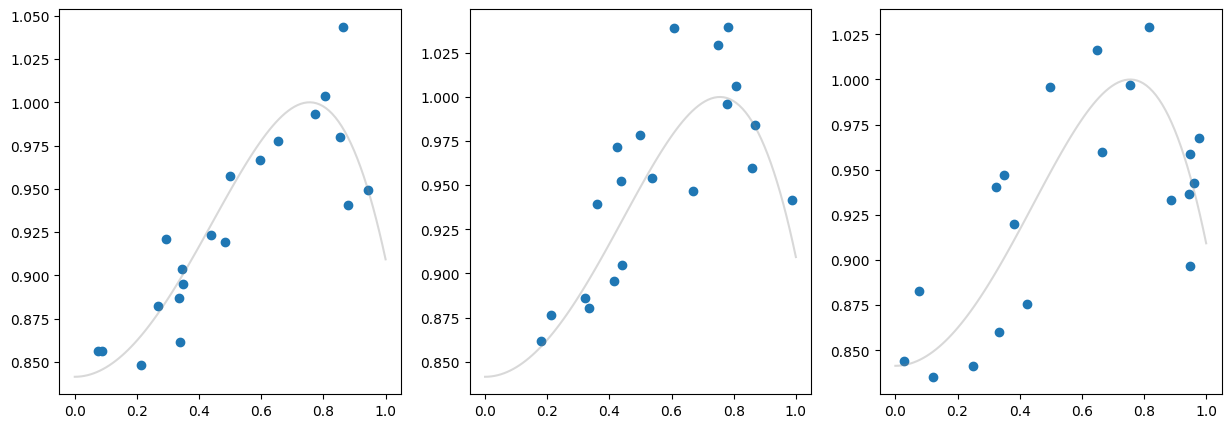

In [11]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))

for i in range(3):
    ax[i].scatter(D[i][0] , D[i][1])

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[i].plot(x , y , c='gray' , alpha=0.3)

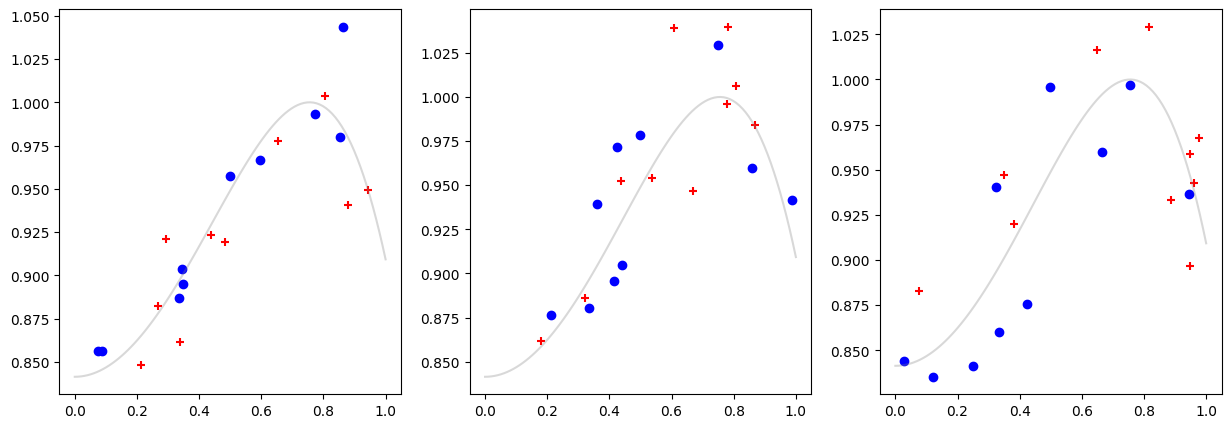

In [12]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))


for test_number in range(3):
    E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[test_number][0] , D[test_number][1] , random_state=24521421 , test_size=0.5 , shuffle=True)
    
    ax[test_number].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[test_number].scatter(E_out_x , E_out_y , c='red', marker='+')

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[test_number].plot(x , y , c='gray' , alpha=0.3)

C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\738301245.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\738301245.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\738301245.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.par

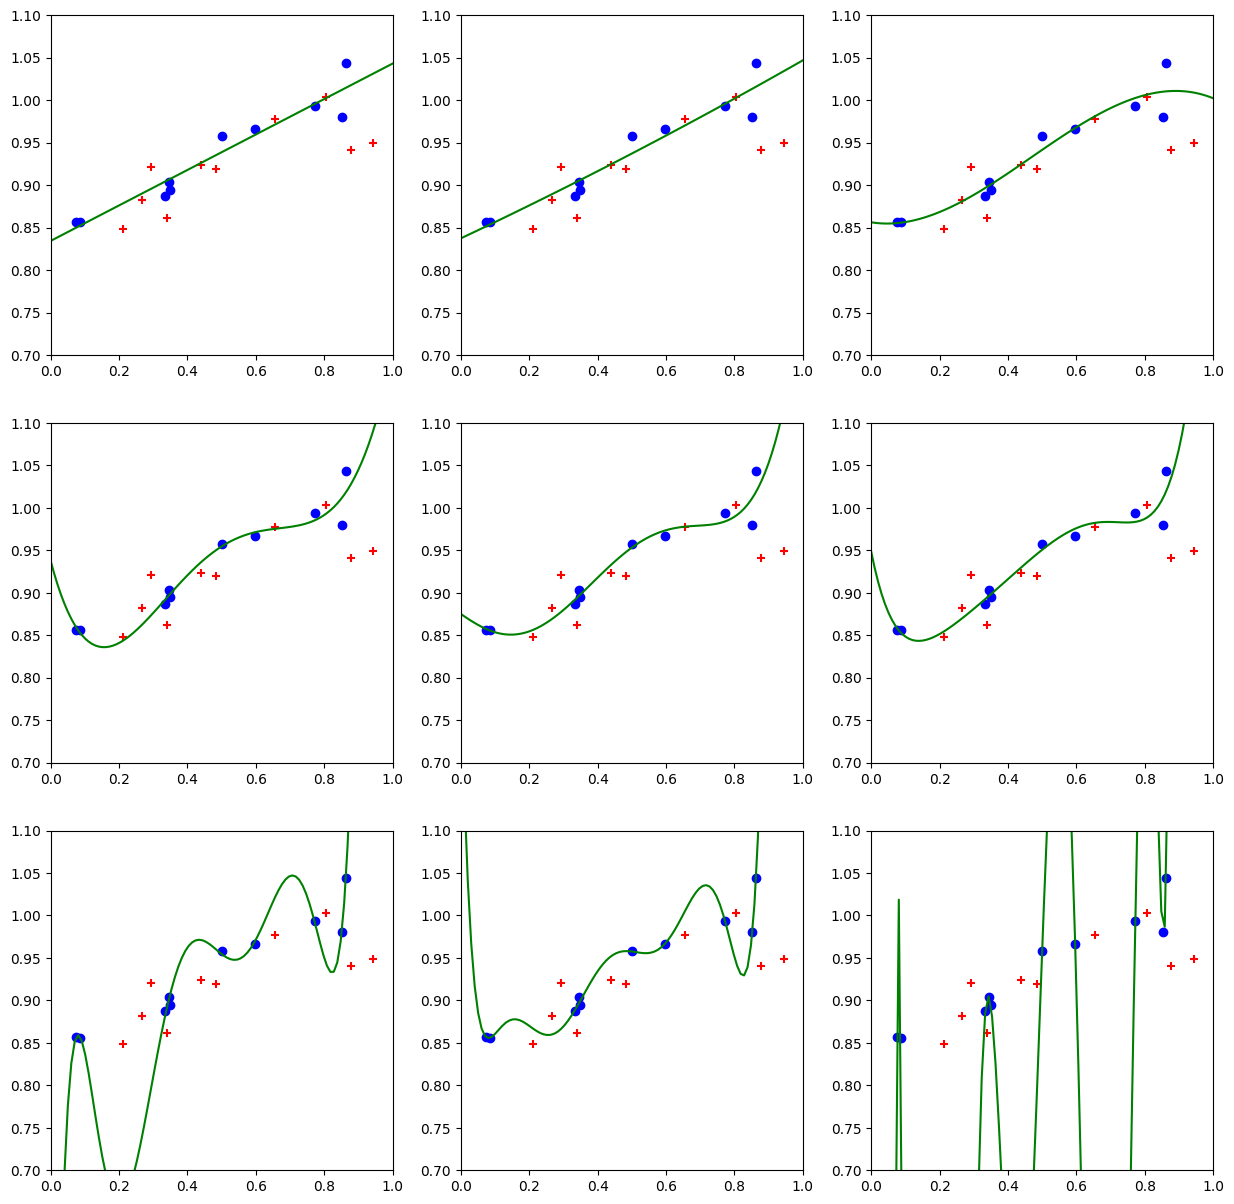

In [13]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2724213178.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2724213178.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2724213178.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

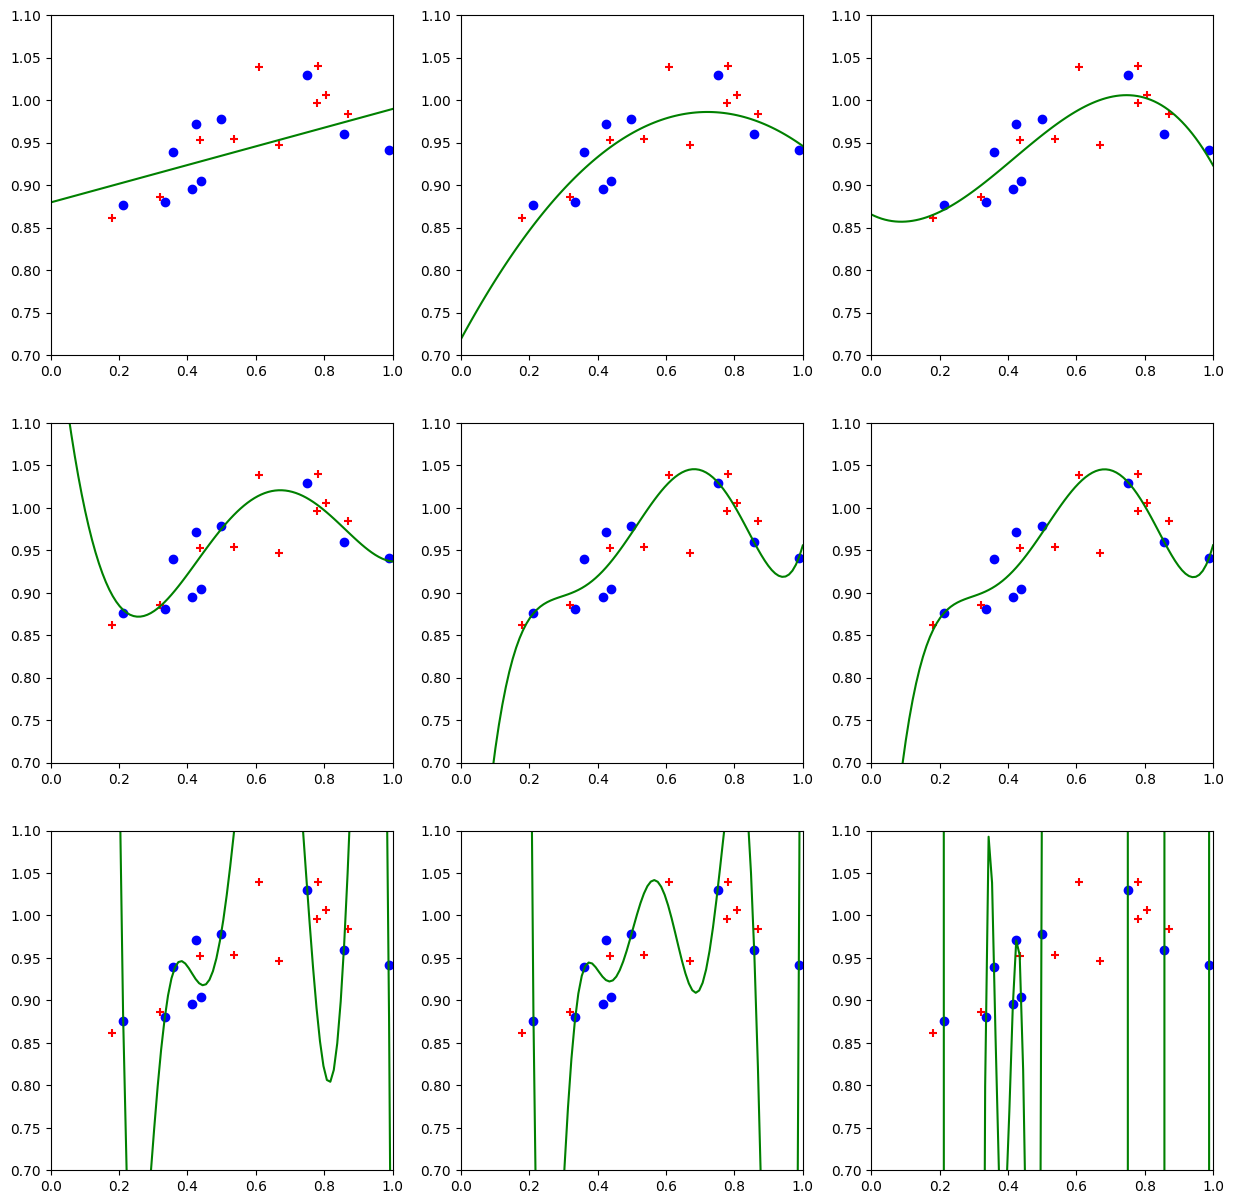

In [14]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[1][0] , D[1][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4103269550.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4103269550.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4103269550.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

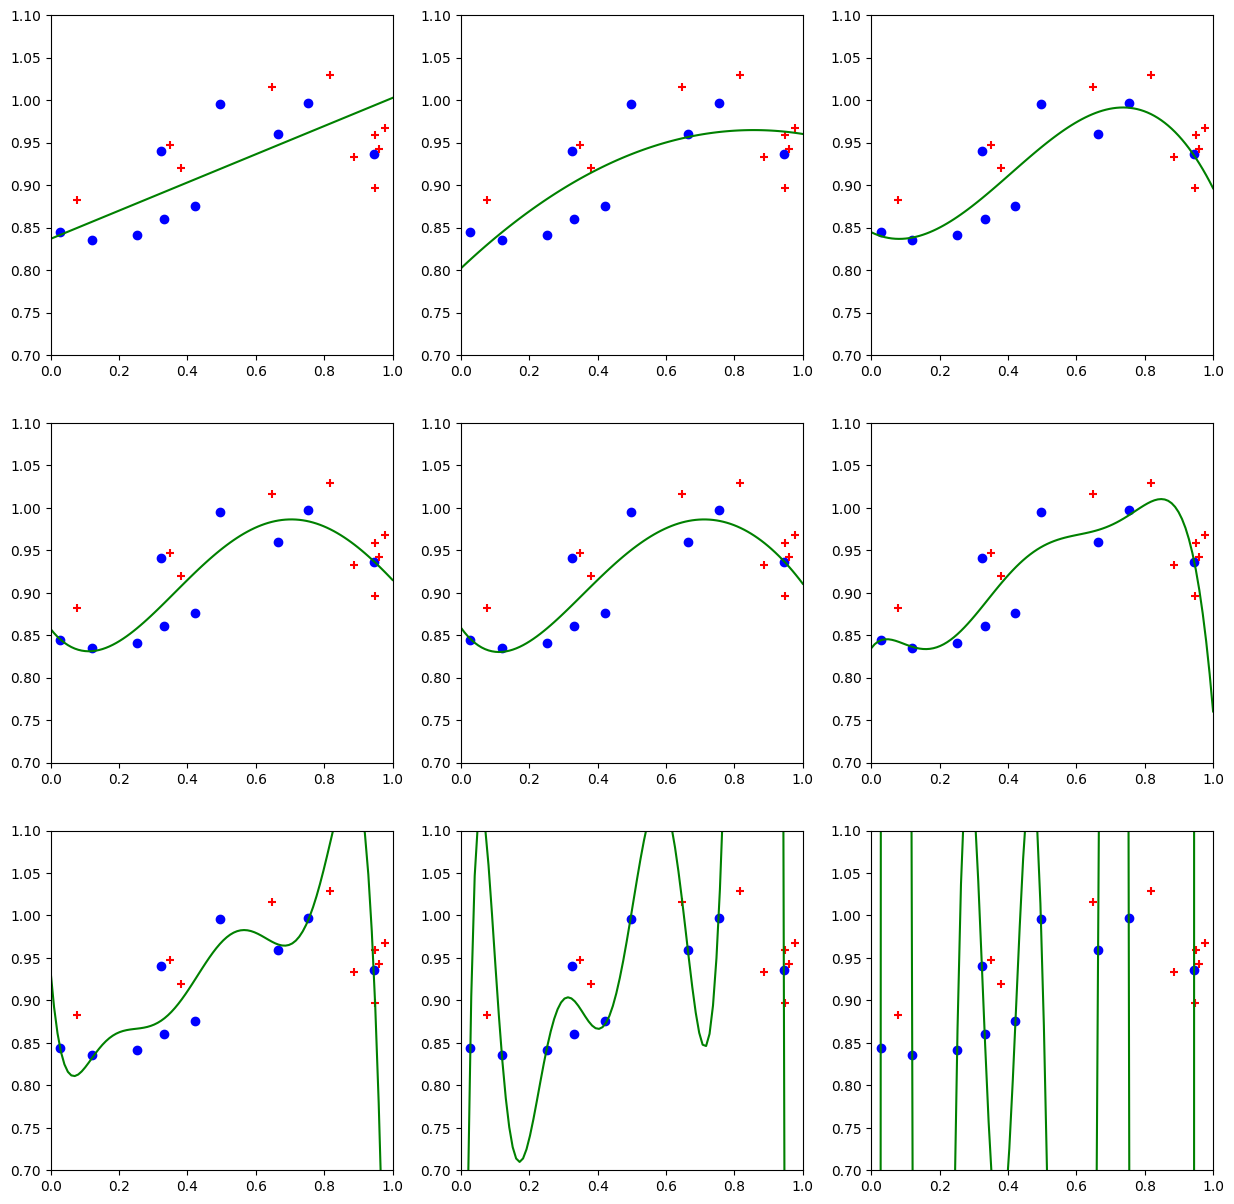

In [15]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[2][0] , D[2][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



In [16]:
E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.8 , 1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(10)]
    df_train = pd.DataFrame(data=points , columns=['X' , 'Y'])
    points = [[E_out_x[i] , E_out_y[i]] for i in range(10)]
    df_test = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    x_train = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_train)
    y_train = result.predict(x_train)
    x_test = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_test)
    y_pred = result.predict(x_test)
    
    mse_in = mean_squared_error(E_in_y , y_train)
    mse_out = mean_squared_error(E_out_y , y_pred)
    print(degree , f"{mse_in:.15f}" , f"{mse_out:.15f}")

1 0.001996103567479 0.001569004855151
2 0.002215956537668 0.001953793101147
3 0.001690889707724 0.001347495381783
4 0.002075117564537 0.003043315838595
5 0.002059243042746 0.002884921509768
6 0.003085621535121 0.003663185468195
7 0.011650308581430 0.014129830819189
8 1.218568816587957 0.931116520248034
9 359.614129950017457 303.661153712869748


|Degree|$\text{E}_{\text{in}}$|$\text{E}_{\text{out}}$|
|---|---|---|
|1 | 0.000282584607296 | 0.001647654139636|
|2 |0.000280922326276 | 0.001707945351183|
|3 |0.000249069477929 | 0.001179267020052|
|4 |0.000187838339733 | 0.003270461988497|
|5 |0.000185642980417 | 0.004067847428192|
|6 |0.000183391215187 | 0.006594083946406|
|7 |0.000025811241011 | 0.486793136508546|
|8 |0.000007603435889 | 0.798335660183840|
|9 |0.000000000000000 | 174.751131833095513|

# Experiment 2:

Làm tương tự như Experiment 1 nhưng với N = 100

In [17]:
D = []

for _ in range(3):
    x = np.random.random(size=200)
    err = np.random.normal(loc=0,scale=0.03,size=200)
    y = [(math.sin(1 + x[i] ** 2) + err[i]) for i in range(200)]
    D.append([x , y])

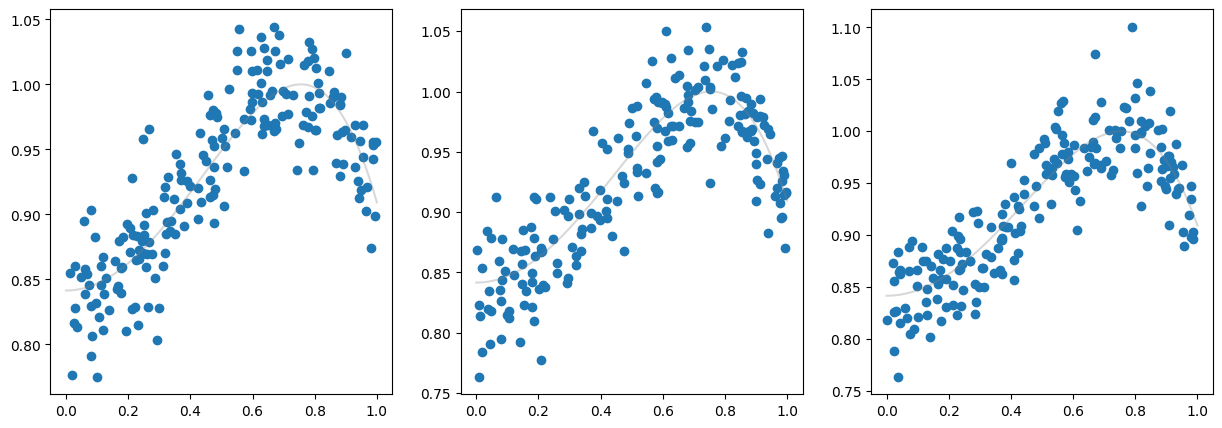

In [18]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))

for i in range(3):
    ax[i].scatter(D[i][0] , D[i][1])

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[i].plot(x , y , c='gray' , alpha=0.3)

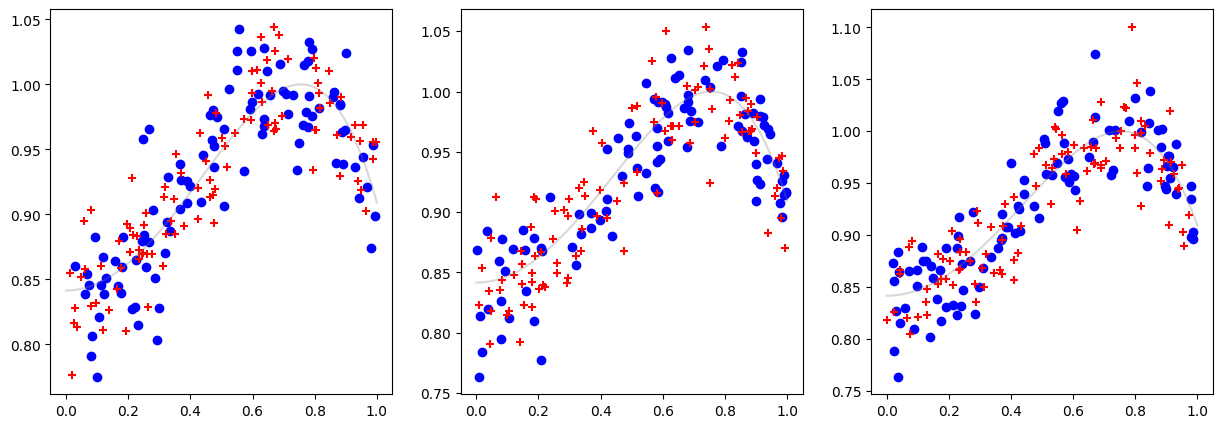

In [21]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))


for test_number in range(3):
    E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[test_number][0] , D[test_number][1] , random_state=24521421 , test_size=0.5 , shuffle=True)
    
    ax[test_number].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[test_number].scatter(E_out_x , E_out_y , c='red', marker='+')

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[test_number].plot(x , y , c='gray' , alpha=0.3)

C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2463524312.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2463524312.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2463524312.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

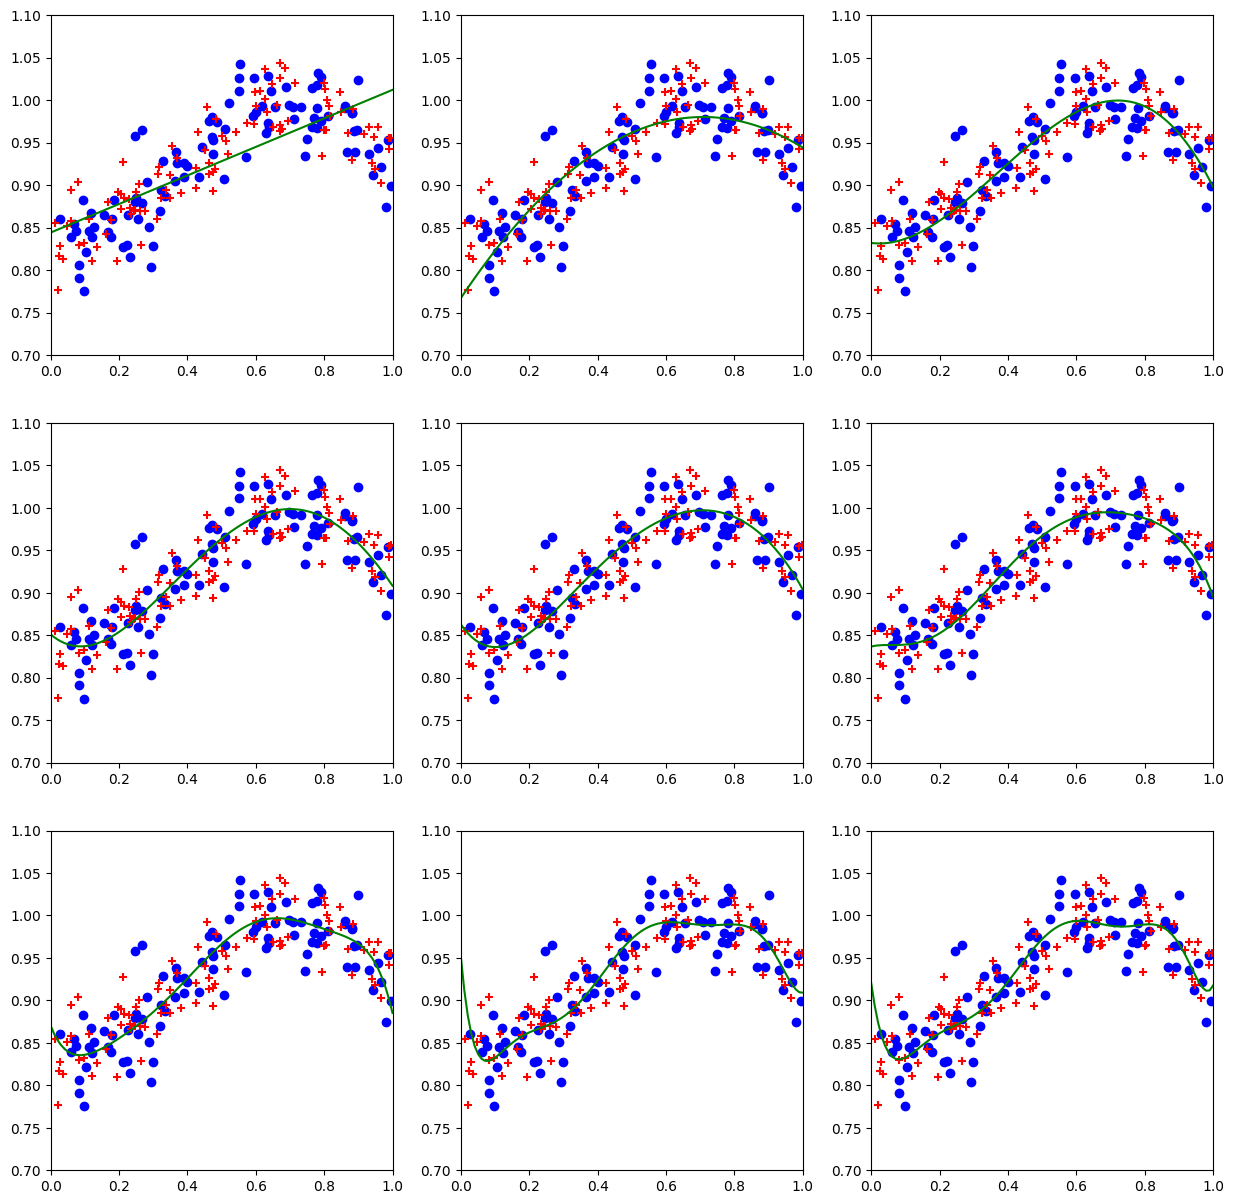

In [22]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(100)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4052352249.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4052352249.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\4052352249.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

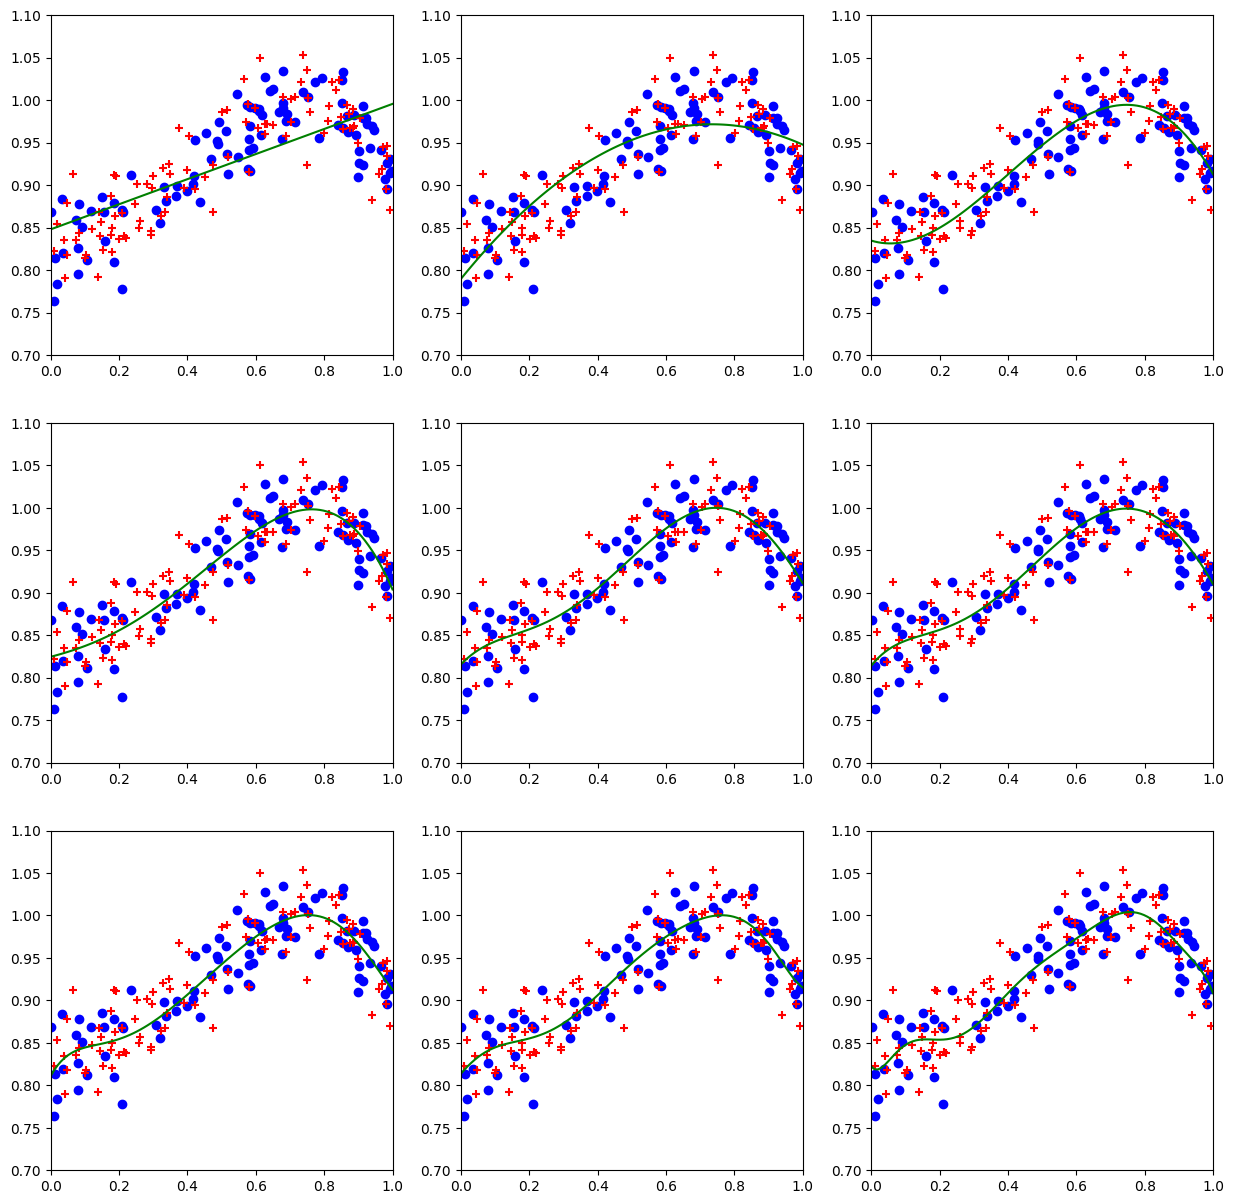

In [23]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[1][0] , D[1][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(100)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2157155379.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2157155379.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\2157155379.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

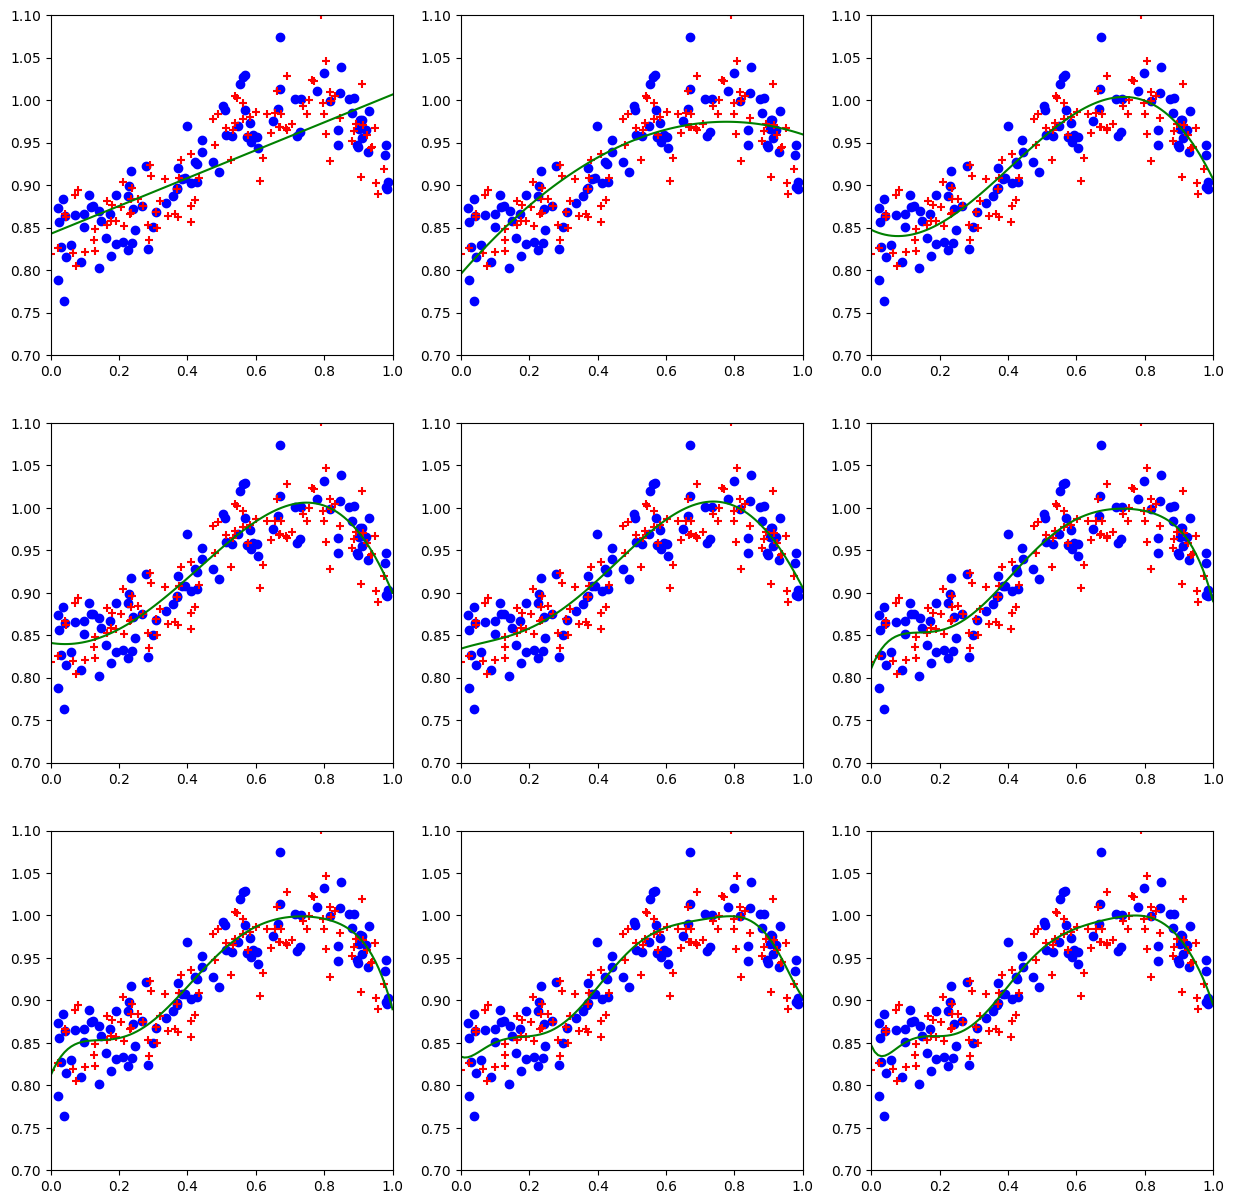

In [24]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[2][0] , D[2][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(100)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



In [25]:
E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.8 , 1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(100)]
    df_train = pd.DataFrame(data=points , columns=['X' , 'Y'])
    points = [[E_out_x[i] , E_out_y[i]] for i in range(100)]
    df_test = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    x_train = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_train)
    y_train = result.predict(x_train)
    x_test = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_test)
    y_pred = result.predict(x_test)
    
    mse_in = mean_squared_error(E_in_y , y_train)
    mse_out = mean_squared_error(E_out_y , y_pred)
    print(degree , f"{mse_in:.15f}" , f"{mse_out:.15f}")

1 0.003733898472910 0.003197854353352
2 0.004027311809256 0.003490391338787
3 0.004767428108872 0.004011715494550
4 0.004845291116951 0.004014185370982
5 0.004877926139570 0.003869671784545
6 0.004771245860910 0.003901343022568
7 0.004752240196480 0.003991831253212
8 0.004673044978184 0.004146781679161
9 0.004960578276366 0.004303441946163


|Degree|$\text{E}_{\text{in}}$|$\text{E}_{\text{out}}$|
|---|---|---|
|1 |0.003733898472910 |0.003197854353352|
|2 |0.004027311809256 |0.003490391338787|
|3 |0.004767428108872 |0.004011715494550|
|4 |0.004845291116951 |0.004014185370982|
|5 |0.004877926139570 |0.003869671784545|
|6 |0.004771245860910 |0.003901343022568|
|7 |0.004752240196480 |0.003991831253212|
|8 |0.004673044978184 |0.004146781679161|
|9 |0.004960578276366 |0.004303441946163|

# Experiment 3:

Làm y chang Experiment 1 nhưng với N = 1000

In [26]:
D = []

for _ in range(3):
    x = np.random.random(size=2000)
    err = np.random.normal(loc=0,scale=0.03,size=2000)
    y = [(math.sin(1 + x[i] ** 2) + err[i]) for i in range(2000)]
    D.append([x , y])

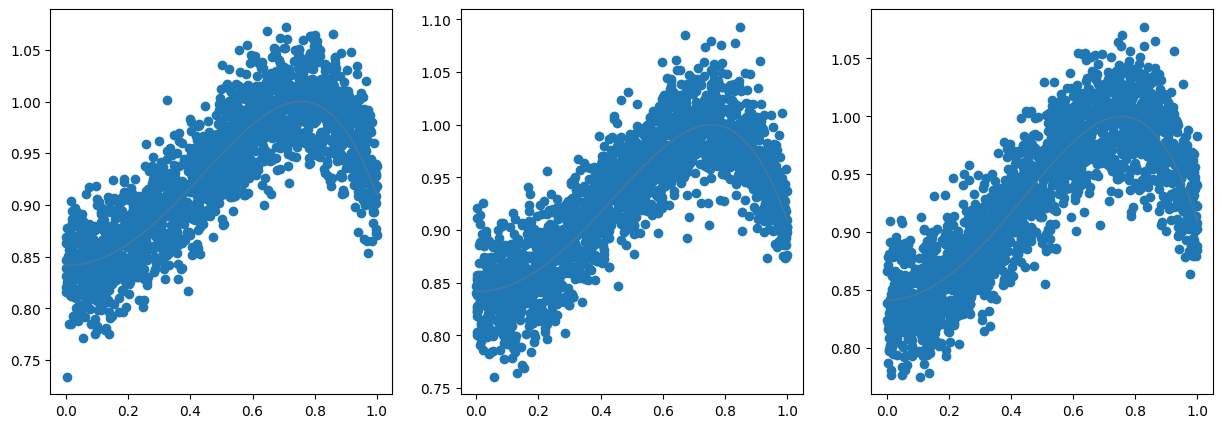

In [27]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))

for i in range(3):
    ax[i].scatter(D[i][0] , D[i][1])

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[i].plot(x , y , c='gray' , alpha=0.3)

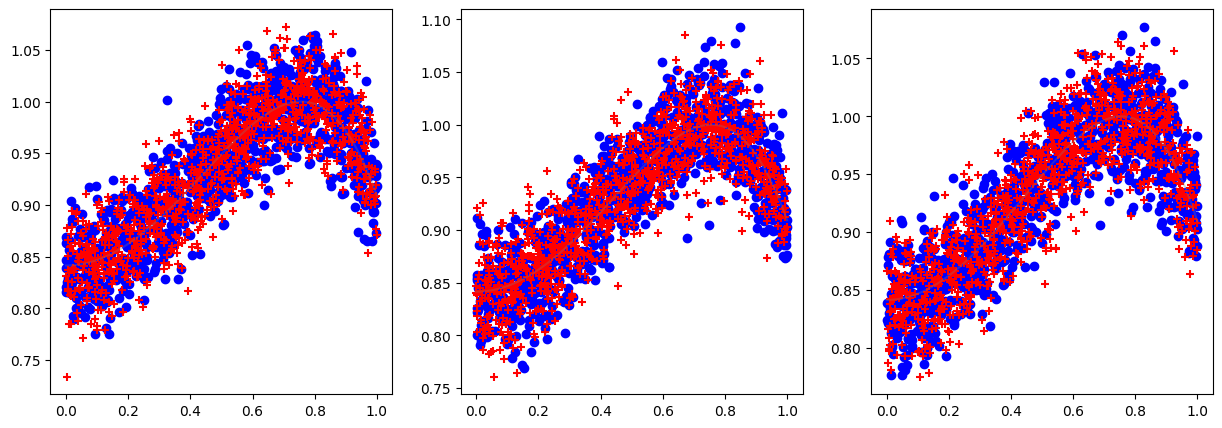

In [28]:
fig , ax = plt.subplots(1 , 3 , figsize=(15,5))


for test_number in range(3):
    E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[test_number][0] , D[test_number][1] , random_state=24521421 , test_size=0.5 , shuffle=True)
    
    ax[test_number].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[test_number].scatter(E_out_x , E_out_y , c='red', marker='+')

    x = np.linspace(0,1,100)
    y = [(math.sin(1 + x[i] ** 2)) for i in range(100)]

    ax[test_number].plot(x , y , c='gray' , alpha=0.3)

C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3224896083.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3224896083.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3224896083.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

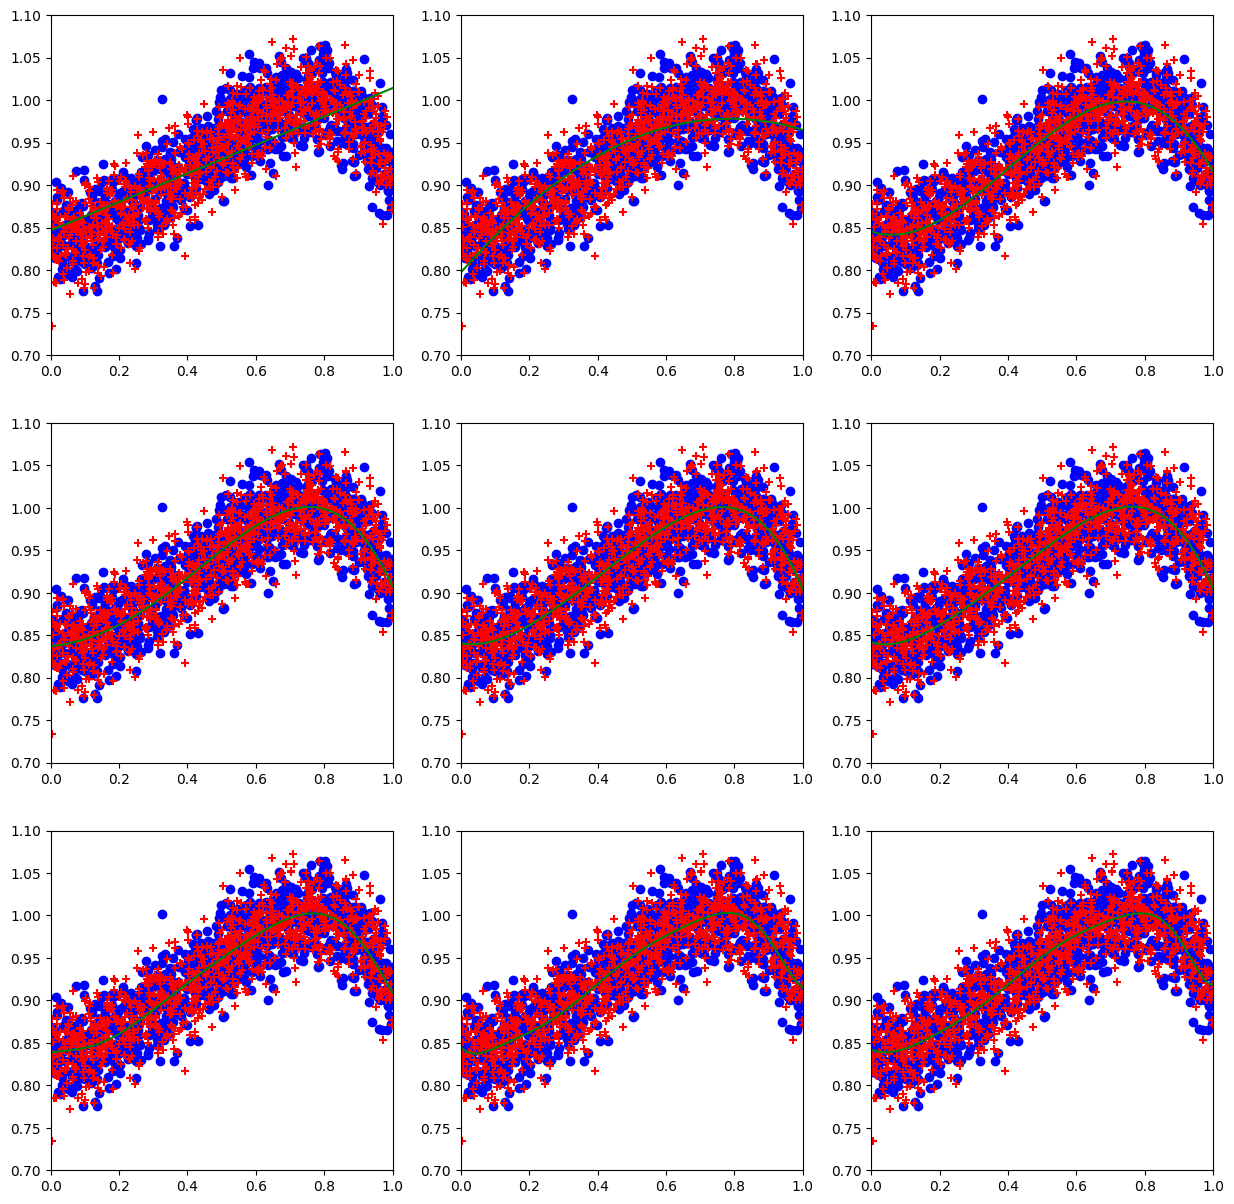

In [29]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(1000)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\879478631.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\879478631.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\879478631.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.par

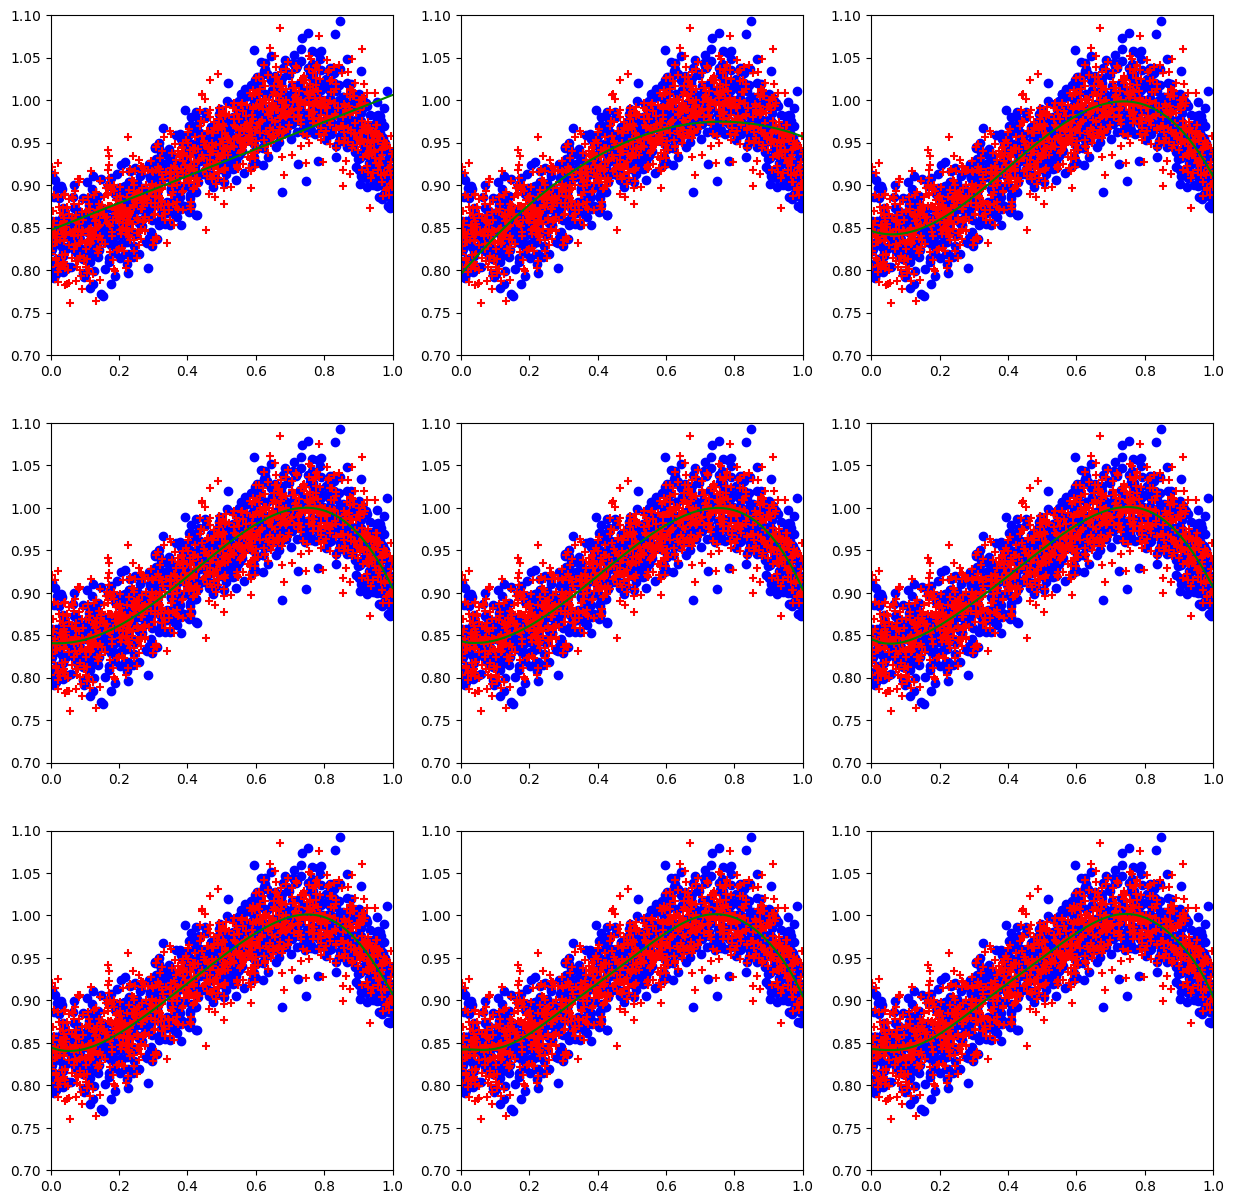

In [30]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[1][0] , D[1][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(1000)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3857054230.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.params[0] for _ in range(100)]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3857054230.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y[i] += (X[i] ** j) * result.params[j]
C:\Users\vumin\AppData\Local\Temp\ipykernel_16136\3857054230.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = [result.

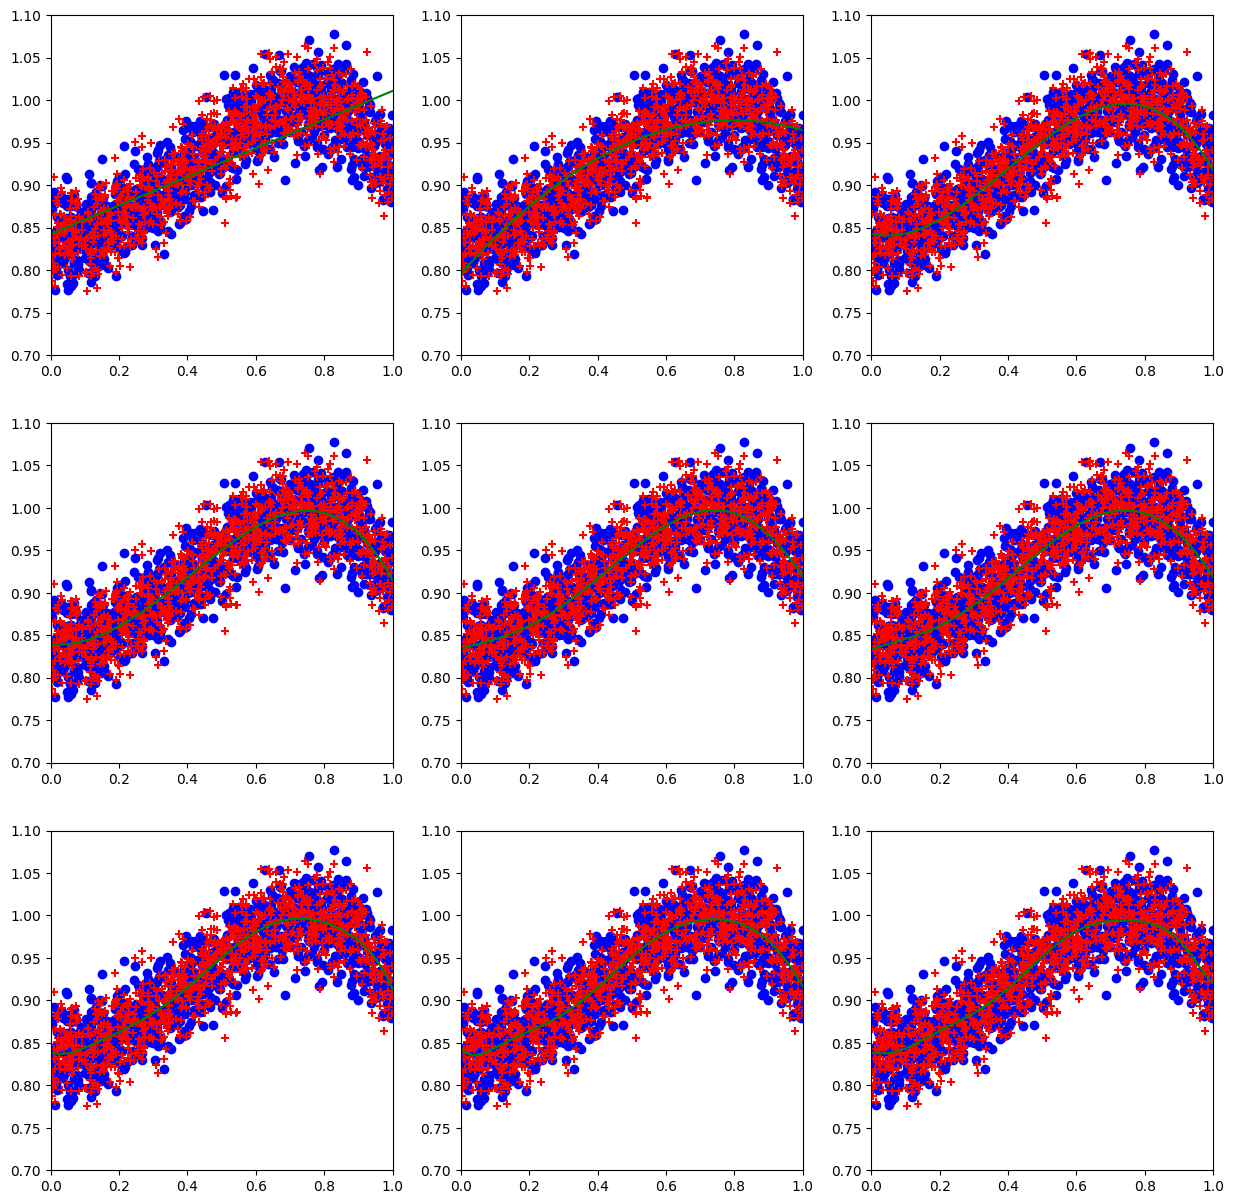

In [31]:
fig , ax = plt.subplots(3 , 3 , figsize=(15,15))

E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[2][0] , D[2][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.7 , 1.1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(1000)]
    df = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    X = np.linspace(0 , 1 , 100)
    y = [result.params[0] for _ in range(100)]
    for i in range(100):
        for j in range(1 , degree + 1):
            y[i] += (X[i] ** j) * result.params[j]

    ax[(degree - 1)//3][degree%3-1].plot(X , y , c='green')



In [32]:
E_in_x , E_out_x , E_in_y , E_out_y = train_test_split(D[0][0] , D[0][1] , random_state=24521421 , test_size=0.5 , shuffle=True)

for degree in range(1 , 10):
    ax[(degree - 1)//3][degree%3-1].set_xlim(0 , 1)
    ax[(degree - 1)//3][degree%3-1].set_ylim(0.8 , 1)
    ax[(degree - 1)//3][degree%3-1].scatter(E_in_x , E_in_y , c='blue', marker='o')
    ax[(degree - 1)//3][degree%3-1].scatter(E_out_x , E_out_y , c='red', marker='+')

    points = [[E_in_x[i] , E_in_y[i]] for i in range(1000)]
    df_train = pd.DataFrame(data=points , columns=['X' , 'Y'])
    points = [[E_out_x[i] , E_out_y[i]] for i in range(1000)]
    df_test = pd.DataFrame(data=points , columns=['X' , 'Y'])

    des = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df)
    model = sm.OLS(E_in_y , des)
    result = model.fit()

    x_train = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_train)
    y_train = result.predict(x_train)
    x_test = MS([poly('X' , degree=degree , raw=True)]).fit_transform(df_test)
    y_pred = result.predict(x_test)
    
    mse_in = mean_squared_error(E_in_y , y_train)
    mse_out = mean_squared_error(E_out_y , y_pred)
    print(degree , f"{mse_in:.15f}" , f"{mse_out:.15f}")

1 0.004466992122758 0.004508024182386
2 0.004502170662769 0.004541752984530
3 0.004500622490308 0.004540260095953
4 0.004516228083935 0.004552034904549
5 0.004538905477739 0.004571873670603
6 0.004537367349515 0.004572511113442
7 0.004539136713518 0.004568087374587
8 0.004538001382842 0.004566665146581
9 0.004533556760785 0.004571009218122


|Degree|$\text{E}_{\text{in}}$|$\text{E}_{\text{out}}$|
|---|---|---|
|1 |0.004466992122758 |0.004508024182386|
|2 |0.004502170662769 |0.004541752984530|
|3 |0.004500622490308 |0.004540260095953|
|4 |0.004516228083935 |0.004552034904549|
|5 |0.004538905477739 |0.004571873670603|
|6 |0.004537367349515 |0.004572511113442|
|7 |0.004539136713518 |0.004568087374587|
|8 |0.004538001382842 |0.004566665146581|
|9 |0.004533556760785 |0.004571009218122|

# Các câu hỏi:
1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?
2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?
3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?
4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?

## Trả lời:

1. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?
    - Khi tăng độ phức tạp của mô hình, mô hình sẽ có khả năng học tốt hơn các đặc trưng của dữ liệu, do đó bias sẽ giảm. Tuy nhiên, nếu tăng quá lớn sẽ dẫn đến việc mô hình học luôn cả nhiều và over-fit trên bộ dữ liệu trainning.

2. Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?
    - Khi mô hình càng phức tạp, variance sẽ càng tăng vì mô hình sẽ nhạy cảm với các biến động nhỏ trên bộ dữ liệu trainning, dẫn đến hiện tương over-fitting.

3. Tăng kích thước tập train ảnh hưởng thế nào đến bias?
    - Khi tăng kích thước của bộ dữ liệu trainning, mô hình được cung cấp nhiều dữ liệu hơn nên hiểu rõ hơn về bản chất của hàm mục tiêu. Tuy nhiên, bias sẽ không bị ảnh hưởng nhiều vì bias dựa vào độ phức tạp của mô hình, không liên quan tới bộ dữ liệu.

4. Tăng kích thước tập train ảnh hưởng thế nào đến variance?
    - Khi bộ dữ liệu trainning lớn, variance sẽ giảm vì khi đó mô hình sẽ ít bị ảnh hưởng bởi dữ liệu nhiễu. Khi đó, mô hình sẽ có khả năng học được đặc trưng của dữ liệu tốt hơn, giảm khả năng over-fit trên bộ dữ liệu trainning.